In [1]:
import torch

#imports necessary to define a neural network 
import torch.nn as nn
import torch.nn.functional as F

#ensure you are using GPU.
if torch.cuda.is_available():  
  dev = "cuda:0" 
else:  
  dev = "cpu"  

device = torch.device(dev)
print(device)

dtype = torch.cuda.FloatTensor
import numpy as np
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

cuda:0


In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize(-0.5,0.5)])

In [3]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

/home/mohammad/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1631630815121/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


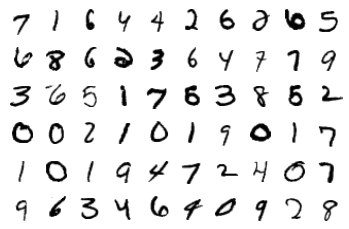

In [5]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [6]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax()).cuda()
model.to(device)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=None)
)


In [7]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images.cuda()) #log probabilities
loss = criterion(logps, labels.cuda()) #calculate the NLL loss

/home/mohammad/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images.cuda())
        loss = criterion(output, labels.cuda())
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
        print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6840214208245023

Training Time (in minutes) = 0.08942570686340331
Epoch 1 - Training loss: 0.31395507232149017

Training Time (in minutes) = 0.18287572065989177


In [ ]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
images, labels = next(iter(valloader))

img = images[0].view(1, 784) 
with torch.no_grad():
    logps = model(img.cuda())

ps = torch.exp(logps)
probab = list(ps.detach().cpu().numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [ ]:
torch.exp(model(img.cuda()))

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img.cuda())

    
    ps = torch.exp(logps)
    probab = list(ps.detach().cpu().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

In [ ]:
images.shape

In [ ]:
img=images[1].reshape([1,784])
print(img.shape)

print(torch.exp(model(img.cuda())))
plt.imshow(img.numpy().reshape(28,28))

In [ ]:
def findloss(diff,pred):
    
#     diff is array of noise
#     pred is the prediction of the above trained model
    
    
    l1=(torch.square(diff))
    l1=torch.mean(l1)
    
    l2=pred**(-1)
    
    fl=l1**(4)+l2
    fl=fl**0.5
    
    return fl

In [ ]:
diff=torch.rand(784).cuda().requires_grad_()

In [ ]:
learning_rate=0.0005
num_descents=2000000 #number of times gradient descent is employed

img=img.cuda()
prevpred=0

for i in range(num_descents):
    
    imagef=img+diff
    pred=torch.exp(model(imagef.reshape([1,784])))[0][8]
    
    totalloss=findloss(diff,pred)
   
      
    if pred>prevpred:
        
        if i%10000 ==0:
            print('Loss and prediction by the model after '+str(i)+' steps of gradient descent are '+str(totalloss.item()),str(pred.item()))
     
        #find gradients of totalt wrt yarray.
        totalloss.backward()

        gradients=diff.grad
        #torch.clip(gradients,max=100.0)
        with torch.no_grad():
            diff[1:]=diff[1:]-learning_rate*gradients[1:]
        diff.grad.data.zero_()
    prevpred=pred

In [ ]:
plt.imshow(imagef.detach().cpu().numpy().reshape(28,28))

In [ ]:
plt.imshow(diff.detach().cpu().numpy().reshape(28,28))